# Tarea 4

Jairo Saul Diaz Soto

Dr. Joaquin Peña Acevedo

Optimizacion I

2024 / 02 / 27

---
# Ejercicio 1

## Obteniendo la Hessiana de las funciones

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [95]:
## Funciones con sus Hessianas y sus Gradientes
def himmelblau(x):
    return ((x[0]**2) + x[1] - 11)**2 + (x[0] + (x[1]**2) - 7)**2

def himmelblau_grad(x):
    return np.array([(4*x[0]*((x[0]**2) + x[1] - 11)) + (2*(x[0] + (x[1]**2) - 7)),
                     (2*((x[0]**2) + x[1] - 11)) + (4*x[1]*(x[0] + (x[1]**2) - 7))])

def himmelblau_hess(x):
    dxx = (12*(x[0]**2)) + (4*x[1]) - 42
    dxy = 4*(x[0]+x[1])
    dyy = (12*(x[1]**2)) + (4*x[0]) - 26
    return np.array([[dxx, dxy],
                    [dxy, dyy]])
    

def beale(x):
    return (1.5 - x[0] + (x[0]*x[1]))**2 + (2.25 - x[0] + (x[0]*x[1]**2))**2 + (2.625 - x[0] + (x[0]*x[1]**3))**2
    
def beale_grad(x):
    return np.array([ (2*(x[1] - 1) * (1.5 - x[0] + (x[0]*x[1]))) + (2*(x[1]**2 - 1)*(2.25 - x[0] + (x[0]*x[1]**2))) + (2*(x[1]**3 - 1)*(2.625 - x[0] + (x[0]*x[1]**3))), 
                    (2*x[0]*(1.5 - x[0] + (x[0]*x[1]))) + (4*(x[0]*x[1])*(2.25 - x[0] + (x[0]*x[1]**2))) + (6*(x[0]*x[1]**2)*(2.625 - x[0] + (x[0]*x[1]**3)))])

def beale_hess(x):
    dxx = 2*(((x[1]-1)**2) + (((x[1]**2)-1)**2) + (((x[1]**3)-1)**2))
    dyy = (2*x[0]**2) + (4*x[0]*(2.25-x[0]+(x[0]*x[1]**2))) + (8*(x[0]*x[1])**2) + (12*x[0]*x[1]*(2.625-x[0]+(x[0]*x[1]**3))) +(18*(x[0]*x[1]**2)**2)
    dxy = (2*(1.5-x[0]+(x[0]*x[1]))) + (2*x[0]*(x[1]-1)) + (4*x[1]*(2.25-x[0]+(x[0]*x[1]**2))) + (4*x[0]*x[1]*(x[1]**2 - 1)) + (6*x[1]**2 *(2.625-x[0] + (x[0]*x[1]**3))) + (6*x[0]*x[1]**2*(x[1]**3 - 1))
    return np.array([[dxx, dxy],
                    [dxy, dyy]])
    

def rosenbrock(x):
    n = len(x)
    res = 0
    for k in range(n-1):
        res += (100 * (x[k+1] - (x[k]**2))**2 ) + (1-x[k])**2
    return res

def rosenbrock_grad(x):
    gradient = np.zeros_like(x)
    n = len(x)
    for i in range(n-1):
        gradient[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i+1] += 200 * (x[i+1] - x[i]**2)
    return gradient

def rosenbrock_hess(x):
    n = len(x)
    sol = np.zeros((n, n))
    for i in range(n-1):
        sol[i, i] += 1200 * x[i]**2 - 400 * x[i+1] + 2
        sol[i, i+1] = -400 * x[i]
        sol[i+1, i] = -400 * x[i]
        sol[i+1, i+1] += 200
    return sol

def hartmann(x):
    A = np.array([[10, 3, 17, 3.5, 1.7, 8],
                [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])
    P = np.array([[1312, 1696, 5569, 124, 8283, 5886],
                [2329, 4135, 8307, 3736, 1004, 9991],
                [2348, 1451, 3522, 2883, 3047, 6650],
                [4047, 8828, 8732, 5743, 1091, 381]])
    P = P / 10000
    a = np.array([1.0, 1.2, 3.0, 3.2])

    n = len(x)
    if n != 6:
        print("Error de dimensionalidad.\n")
        return 0
    sum1 = 0
    for i in range(4):
        sum2 = 0
        for j in range(n):
            sum2 += A[i,j]*(x[j] - P[i,j])**2
        sum1 += a[i] * np.exp(-sum2)

    return -(2.58 + sum1) / 1.94

def hartmann_grad(x):
    A = np.array([[10, 3, 17, 3.5, 1.7, 8],
                [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])
    P = np.array([[1312, 1696, 5569, 124, 8283, 5886],
                [2329, 4135, 8307, 3736, 1004, 9991],
                [2348, 1451, 3522, 2883, 3047, 6650],
                [4047, 8828, 8732, 5743, 1091, 381]])
    P = P / 10000
    a = np.array([1.0, 1.2, 3.0, 3.2])
    n = len(x)
    sol = []
    if n != 6:
        print("Error de dimensionalidad.\n")
        return 0
    for k in range(n):
        sum1 = 0
        for i in range(4):
            sum2 = 0
            for j in range(n):
                sum2 += A[i,j]*((x[j] - P[i,j])**2)
            sum1 += a[i]* A[i,k]*(x[k]-P[i,k])*np.exp(-sum2)
        sol.append((2*sum1)/1.94)
    return np.asarray(sol)

def hartmann_hess(x):
    A = np.array([[10, 3, 17, 3.5, 1.7, 8],
                [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])
    P = np.array([[1312, 1696, 5569, 124, 8283, 5886],
                [2329, 4135, 8307, 3736, 1004, 9991],
                [2348, 1451, 3522, 2883, 3047, 6650],
                [4047, 8828, 8732, 5743, 1091, 381]])
    P = P / 10000
    a = np.array([1.0, 1.2, 3.0, 3.2])
    n = len(x)
    if n != 6:
        print("Error de dimensionalidad.\n")
        return 0
    sol =  np.zeros((n,n))
    for k in range(n):
        for l in range(n):
            sum1 = 0
            for i in range(4):
                sum2 = 0
                for j in range(n):
                    sum2 += A[i,j]*(x[j] - P[i,j])**2
                if k != l:
                    sum1 += a[i]* A[i,k]*(x[k]-P[i,k])*A[i,l]*(x[l]-P[i,l])*np.exp(-sum2)
                else:
                    sum1 += a[i]*A[i,k]*np.exp(-sum2)*(1 + (2*A[i,k]*((x[k]-P[i,k])**2)))
            sol[k,l] = (-4*sum1)/1.94
    return sol

---
# Ejercicio 2

## Funcion del metodo de Newton puro

In [96]:
def Newton_puro(f_fun, f_grad, f_hess, x0, tol, NMax):
    n = len(x0)
    if n == 2:
        record = []
    else:
        record = None
    x = x0
    for i in range(NMax):
        if n == 2:
            record.append(x)
        g = f_grad(x)
        if np.sqrt(g@g) < tol:
            return i, x, g, record, True
        H = f_hess(x)
        p = sp.linalg.solve(H, -g)
        x = x + p
    return i, x, g, record, False

---
## Probando el Metodo

In [97]:
eps_m = np.finfo(float).eps

In [98]:
NMax = 1000

In [99]:
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, puntos=None):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i, j] = fncf(np.array([x, y]))
    
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')
    
    # Grafica los puntos y conecta la secuencia con líneas
    if puntos is not None:
        puntos = np.array(puntos)
        ax.plot(puntos[:, 0], puntos[:, 1], color='red', marker='o', linestyle='-', linewidth=2, label='Secuencia de puntos')
    
    ax.legend()  # Muestra la leyenda si se han graficado puntos
    plt.show()

### Funcion de Himmemblau

El algoritmo realizo el siguiente numero de iteraciones:  6
El punto optimo encontrado es:  [3. 2.]
La funcion en el punto optimo es: 7.394064262118014e-23
El modulo del gradiente en el punto optimo es:  4.5671866356319916e-21
El algortimo tuvo el estatus de convergencia:  True


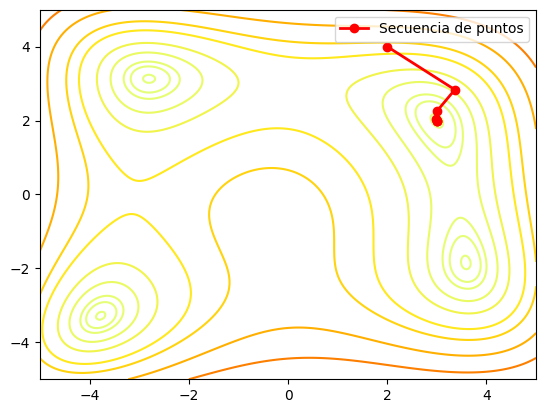

In [100]:
fun = himmelblau
grad = himmelblau_grad
hess =  himmelblau_hess
x0 = np.asarray([2,4])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-5, 5]
ysearch = [-5, 5]

k, x, g, rcd, bl = Newton_puro(fun, grad, hess, x0, tol, NMax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

---
### Funcion de Beale

El algoritmo realizo el siguiente numero de iteraciones:  10
El punto optimo encontrado es:  [2.88586679e-13 1.00000000e+00]
La funcion en el punto optimo es: 14.203125
El modulo del gradiente en el punto optimo es:  6.424326600751724e-23
El algortimo tuvo el estatus de convergencia:  True


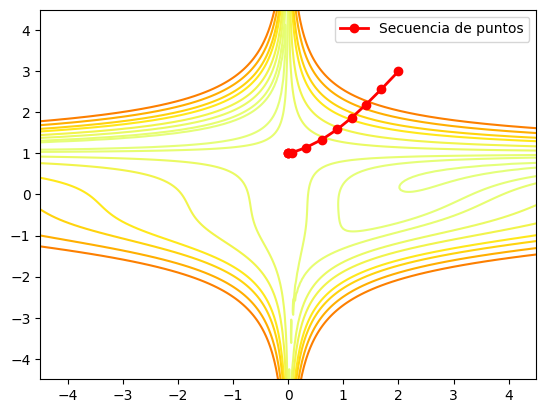

In [101]:
fun = beale
grad = beale_grad
hess =  beale_hess
x0 = np.asarray([2,3])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-4.5, 4.5]
ysearch = [-4.5, 4.5]

k, x, g, rcd, bl = Newton_puro(fun, grad, hess, x0, tol, NMax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

---
### Funcion de Rosenbrock 2D

El algoritmo realizo el siguiente numero de iteraciones:  6
El punto optimo encontrado es:  [1. 1.]
La funcion en el punto optimo es: 3.4326461875363225e-20
El modulo del gradiente en el punto optimo es:  6.865292045957414e-17
El algortimo tuvo el estatus de convergencia:  True


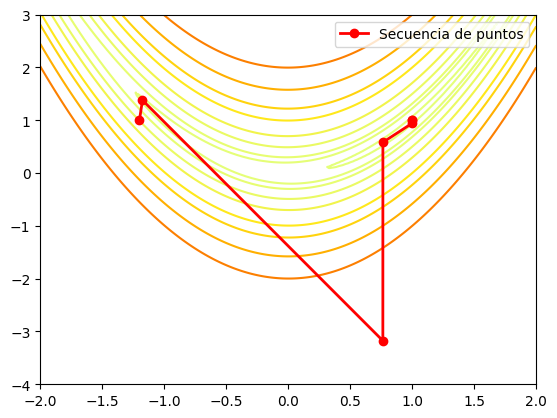

In [102]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
x0 = np.asarray([-1.2,1.0])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]

k, x, g, rcd, bl = Newton_puro(fun, grad, hess, x0, tol, NMax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

### Funcion de Rosenbrock 10D

In [103]:
from itertools import cycle

In [104]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
cic = cycle([-1.2, 1.0])
x0 = np.asarray([next(cic) for _ in range(10)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]

k, x, g, rcd, bl = Newton_puro(fun, grad, hess, x0, tol, NMax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  34
El punto optimo encontrado es:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
La funcion en el punto optimo es: 4.218211823539767e-26
El modulo del gradiente en el punto optimo es:  6.78923277317336e-26
El algortimo tuvo el estatus de convergencia:  True


### Funcion de Rosenbrock 20D

In [105]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
cic = cycle([-1.2, 1.0])
x0 = np.asarray([next(cic) for _ in range(20)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]

k, x, g, rcd, bl = Newton_puro(fun, grad, hess, x0, tol, NMax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  46
El punto optimo encontrado es:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
La funcion en el punto optimo es: 2.1336222295899554e-29
El modulo del gradiente en el punto optimo es:  9.467859280656002e-27
El algortimo tuvo el estatus de convergencia:  True


---
### Funcion de Hartmann

In [106]:
fun = hartmann
grad = hartmann_grad
hess =  hartmann_hess
cic = cycle([0])
x0 = np.asarray([next(cic) for _ in range(6)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]

k, x, g, rcd, bl = Newton_puro(fun, grad, hess, x0, tol, NMax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  19
El punto optimo encontrado es:  [-0.57757214 -0.49141627 -0.69137266 -0.32655683 -0.23342964 -0.289038  ]
La funcion en el punto optimo es: -1.3298969081442549
El modulo del gradiente en el punto optimo es:  6.672327537056718e-16
El algortimo tuvo el estatus de convergencia:  True


---
# Ejercicio 3

## Metodo de Newton Amortiguado

In [107]:
def bt_armijo(a0, rho, c0, x0, f_func, grad_fun, p0, NMax):
    a = a0
    for k in range(NMax):
        if f_func(x0 + (a*p0)) <= f_func(x0) + (c0*a*(grad_fun(x0)@p0)):
            return a, k
        a *= rho
    return a, k

In [108]:
def Newton_amortiguado(f_fun, f_grad, f_hess, x0, NMax, tol, rho, c, Nbmax, a0=1.0):
    n = len(x0)
    if n == 2:
        record = []
    else:
        record = None
    x = x0
    for i in range(NMax):
        if n == 2:
            record.append(x)
        g = f_grad(x)
        if np.sqrt(g@g) < tol:
            return i, x, g, record, True
        H = f_hess(x)
        p = sp.linalg.solve(H, -g)
        if g@p > 0:
            p =-p
        a, _ = bt_armijo(a0, rho, c, x, fun, grad, p, Nbmax)
        x = x + (a*p)
    return i, x, g, record, False
    

---
## Probando el algoritmo

### Funcion de Himmemblau

El algoritmo realizo el siguiente numero de iteraciones:  6
El punto optimo encontrado es:  [3. 2.]
La funcion en el punto optimo es: 7.394064262118014e-23
El modulo del gradiente en el punto optimo es:  4.5671866356319916e-21
El algortimo tuvo el estatus de convergencia:  True


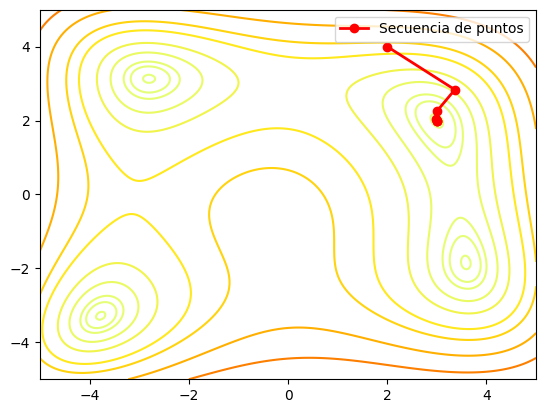

In [109]:
fun = himmelblau
grad = himmelblau_grad
hess =  himmelblau_hess
x0 = np.asarray([2,4])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-5, 5]
ysearch = [-5, 5]
rho = 0.5
c = 0.1
Nbmax = 500

k, x, g, rcd, bl = Newton_amortiguado(fun, grad, hess, x0, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

---
### Funcion de Beale

El algoritmo realizo el siguiente numero de iteraciones:  10
El punto optimo encontrado es:  [2.88586679e-13 1.00000000e+00]
La funcion en el punto optimo es: 14.203125
El modulo del gradiente en el punto optimo es:  6.424326600751724e-23
El algortimo tuvo el estatus de convergencia:  True


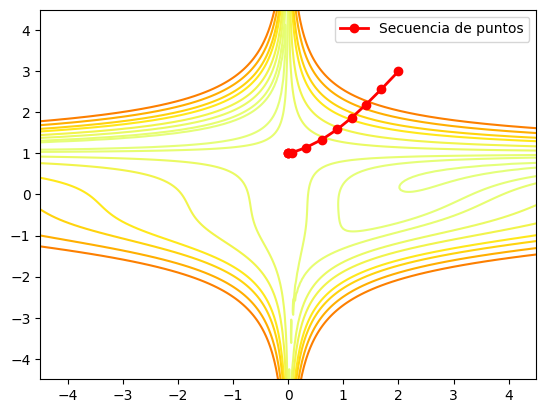

In [110]:
fun = beale
grad = beale_grad
hess =  beale_hess
x0 = np.asarray([2,3])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-4.5, 4.5]
ysearch = [-4.5, 4.5]
rho = 0.5
c = 0.1
Nbmax = 500

k, x, g, rcd, bl = Newton_amortiguado(fun, grad, hess, x0, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

---
### Funcion de Rosenbrock 2D

El algoritmo realizo el siguiente numero de iteraciones:  21
El punto optimo encontrado es:  [1. 1.]
La funcion en el punto optimo es: 7.682025128905186e-24
El modulo del gradiente en el punto optimo es:  1.4802817840082305e-20
El algortimo tuvo el estatus de convergencia:  True


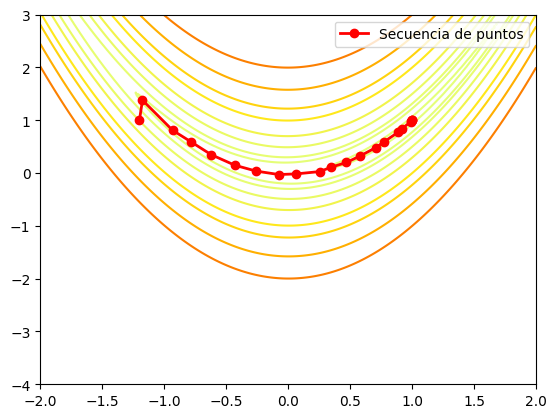

In [111]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
x0 = np.asarray([-1.2,1.0])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500

k, x, g, rcd, bl = Newton_amortiguado(fun, grad, hess, x0, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

### Funcion de Rosenbrock 10D

In [112]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
cic = cycle([-1.2, 1.0])
x0 = np.asarray([next(cic) for _ in range(10)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500

k, x, g, rcd, bl = Newton_amortiguado(fun, grad, hess, x0, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

El algoritmo realizo el siguiente numero de iteraciones:  38
El punto optimo encontrado es:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
La funcion en el punto optimo es: 9.31431366843056e-26
El modulo del gradiente en el punto optimo es:  3.6763909395925635e-23
El algortimo tuvo el estatus de convergencia:  True


### Funcion de Rosenbrock 20D

In [113]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
cic = cycle([-1.2, 1.0])
x0 = np.asarray([next(cic) for _ in range(20)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500

k, x, g, rcd, bl = Newton_amortiguado(fun, grad, hess, x0, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  51
El punto optimo encontrado es:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
La funcion en el punto optimo es: 2.1192353956127703e-20
El modulo del gradiente en el punto optimo es:  8.844499024393926e-19
El algortimo tuvo el estatus de convergencia:  True


---
### Funcion de Hartmann

In [114]:
fun = hartmann
grad = hartmann_grad
hess =  hartmann_hess
cic = cycle([0])
x0 = np.asarray([next(cic) for _ in range(6)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500

k, x, g, rcd, bl = Newton_amortiguado(fun, grad, hess, x0, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  63
El punto optimo encontrado es:  [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
La funcion en el punto optimo es: -3.042457737843049
El modulo del gradiente en el punto optimo es:  9.15250272619327e-16
El algortimo tuvo el estatus de convergencia:  True


---
# Ejercicio 4

## Metodo de Newton con modificacion de la Matriz Hessiana

In [115]:
def Newton_mod_Hess(f_fun, f_grad, f_hess, x0, d, NMax, tol, rho, c, Nbmax, a0=1.0):
    n = len(x0)
    if n == 2:
        record = []
    else:
        record = None
    x = x0
    for i in range(NMax):
        if n == 2:
            record.append(x)
        g = f_grad(x)
        if np.sqrt(g@g) < tol:
            if record is not None:
                record = np.asarray(record)
            return i, x, g, record, True
        H = f_hess(x)
        ## Descomposicion espectral
        e_vals, e_vecs = np.linalg.eig(H)
        ##Modificacion
        for i in range(len(e_vals)):
            if e_vals[i] < d:
                e_vals[i] = d
        ##Construccion de la matriz hessiana modificada
        H_hat = e_vecs @ np.diag(e_vals) @ e_vecs.T
        L = sp.linalg.cholesky(H_hat, lower=True)
        p = sp.linalg.cho_solve((L, True), -g)

        a, _ = bt_armijo(a0, rho, c, x, fun, grad, p, Nbmax)
        x = x + (a*p)
    if record is not None:
        record = np.asarray(record)
    return i, x, g, record, False
    

## Probando el algoritmo

### Funcion de Himmemblau

El algoritmo realizo el siguiente numero de iteraciones:  6
El punto optimo encontrado es:  [3. 2.]
La funcion en el punto optimo es: 7.394064262118014e-23
El modulo del gradiente en el punto optimo es:  4.5671866356319916e-21
El algortimo tuvo el estatus de convergencia:  True


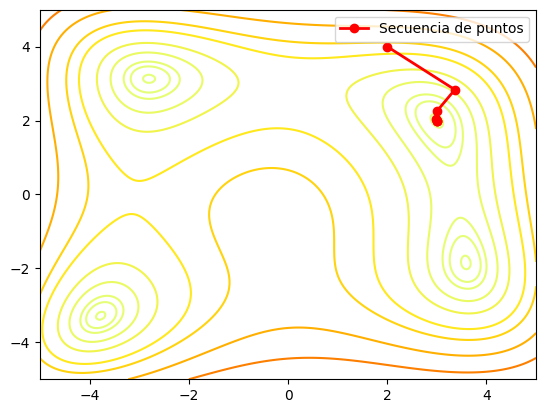

In [116]:
fun = himmelblau
grad = himmelblau_grad
hess =  himmelblau_hess
x0 = np.asarray([2,4])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-5, 5]
ysearch = [-5, 5]
rho = 0.5
c = 0.1
Nbmax = 500
delta = 0.005

k, x, g, rcd, bl = Newton_mod_Hess(fun, grad, hess, x0, delta, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

---
### Funcion de Beale

El algoritmo realizo el siguiente numero de iteraciones:  119
El punto optimo encontrado es:  [3.  0.5]
La funcion en el punto optimo es: 2.9614244769855084e-22
El modulo del gradiente en el punto optimo es:  2.5224114436254364e-20
El algortimo tuvo el estatus de convergencia:  True


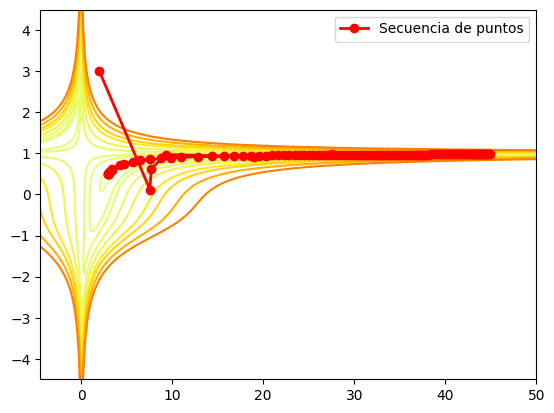

In [117]:
fun = beale
grad = beale_grad
hess =  beale_hess
x0 = np.asarray([2,3])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-4.5, 50]
ysearch = [-4.5, 4.5]
rho = 0.5
c = 0.1
Nbmax = 500
delta = 0.005

k, x, g, rcd, bl = Newton_mod_Hess(fun, grad, hess, x0, delta, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

---
### Funcion de Rosenbrock 2D

El algoritmo realizo el siguiente numero de iteraciones:  21
El punto optimo encontrado es:  [1. 1.]
La funcion en el punto optimo es: 7.682025128905186e-24
El modulo del gradiente en el punto optimo es:  1.4802817840082305e-20
El algortimo tuvo el estatus de convergencia:  True


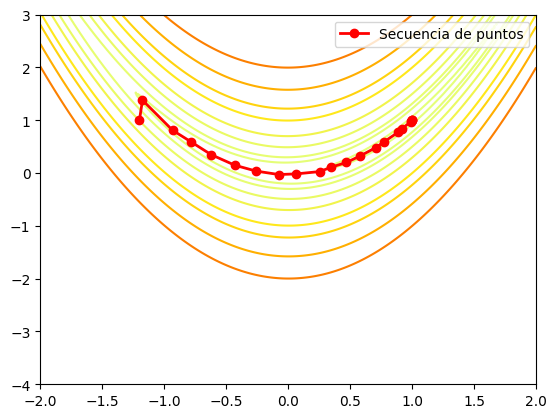

In [118]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
x0 = np.asarray([-1.2,1.0])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500
delta = 0.005

k, x, g, rcd, bl = Newton_mod_Hess(fun, grad, hess, x0, delta, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

### Funcion de Rosenbrock 10D

In [119]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
cic = cycle([-1.2, 1.0])
x0 = np.asarray([next(cic) for _ in range(10)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500
delta = 0.005

k, x, g, rcd, bl = Newton_mod_Hess(fun, grad, hess, x0, delta, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)

El algoritmo realizo el siguiente numero de iteraciones:  26
El punto optimo encontrado es:  [-0.99326337  0.99660604  0.99824061  0.99898843  0.99922615  0.99907365
  0.99845418  0.99705625  0.99417938  0.98839263]
La funcion en el punto optimo es: 3.986579112347138
El modulo del gradiente en el punto optimo es:  6.684995294725824e-25
El algortimo tuvo el estatus de convergencia:  True


### Funcion de Rosenbrock 20D

In [120]:
fun = rosenbrock
grad = rosenbrock_grad
hess =  rosenbrock_hess
cic = cycle([-1.2, 1.0])
x0 = np.asarray([next(cic) for _ in range(20)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500
delta = 0.005

k, x, g, rcd, bl = Newton_mod_Hess(fun, grad, hess, x0, delta, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  41
El punto optimo encontrado es:  [-0.9932861   0.99665107  0.99833032  0.99916774  0.9995852   0.99979328
  0.99989698  0.99994866  0.99997441  0.99998724  0.99999363  0.99999679
  0.99999834  0.99999905  0.99999927  0.99999913  0.99999855  0.99999724
  0.99999453  0.99998905]
La funcion en el punto optimo es: 3.986623854261196
El modulo del gradiente en el punto optimo es:  2.310773899793262e-18
El algortimo tuvo el estatus de convergencia:  True


---
### Funcion de Hartmann

In [121]:
fun = hartmann
grad = hartmann_grad
hess =  hartmann_hess
cic = cycle([0])
x0 = np.asarray([next(cic) for _ in range(6)])
tol = np.sqrt(len(x0)*eps_m)
xsearch = [-2, 2]
ysearch = [-4, 3]
rho = 0.5
c = 0.1
Nbmax = 500
delta = 0.005

k, x, g, rcd, bl = Newton_mod_Hess(fun, grad, hess, x0, delta, NMax, tol, rho, c, Nbmax)

print("El algoritmo realizo el siguiente numero de iteraciones: ", k)
print("El punto optimo encontrado es: ", x)
print("La funcion en el punto optimo es:", fun(x))
print("El modulo del gradiente en el punto optimo es: ", g@g)
print("El algortimo tuvo el estatus de convergencia: ", bl)
if rcd is not None:
    contornosFnc2D(fun, xsearch[0], xsearch[1], ysearch[0], ysearch[1], [0.5, 5, 10, 25, 50, 100, 150, 250, 400], rcd)
    

El algoritmo realizo el siguiente numero de iteraciones:  91
El punto optimo encontrado es:  [0.20168951 0.15001069 0.47687397 0.27533243 0.31165162 0.65730053]
La funcion en el punto optimo es: -3.042457737843049
El modulo del gradiente en el punto optimo es:  1.2393353167822034e-15
El algortimo tuvo el estatus de convergencia:  True


## Comparativa de los metodos.

Bien comenzando para el caso de la primer funcion, la de **Himmemblau**, en este caso, los tres metodos obtuvieron los mismos resultados, encontrando el mismo minimo, en las mismas iteraciones y en cuestion de error, etc, tambien fueron identicos. 

Para la funcion de **Beale**, los primeros dos metodos no encontraron el minimo global de la funcion, asi que se puede argumentar que si hace una diferencia lo de modificar la matris Hessiana asociada.

Para la funcion de **Rosenbrock 2D**, parece que el mejor metodo es el de Newton puro, dado que solo tiene 6 iteraciones en comparacion con las 21, que realizaron los otros metodos. Entonces, para este caso se puede decir que no es necesario modificar el metodo.

De forma un poco general, el comentario anterior se extiende para el caso de 10D y 20D, sin embargo, aparece algo particular, que es el hecho de que con la modificacion de la matriz Hessiana asocidad, el algoritmo no alcanza su minimo global.

En el caso de la funcion de **Hartmann**, aparece el problema de que con el primer metodo no se alcanza el minimo global, mientras que en el metodo de Newton amortiguado es el mejor de los dos restantes, puesto que en el caso del metodo de modificacion de Hessiana, aumenta las iteraciones y se baja la precision.

De forma general, entonces parece a grandes rasgos que no es del todo conveniente la implementacion de algoritmos mas complejos, salvo excepciones, pero de forma general parece mas efectivo el emplear metodos mas simples.